In [347]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tool
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [348]:
#read
CPBL_data = pd.read_excel("CPBL_batter.xlsx")
MLB_data = pd.read_excel("MLB_batter.xlsx")


In [349]:
#first view
CPBL_data.info()
CPBL_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   球員        174 non-null    object 
 1   背號        174 non-null    int64  
 2   PA        174 non-null    int64  
 3   AVG       174 non-null    float64
 4   OBP       174 non-null    float64
 5   SLG       174 non-null    float64
 6   ISO       174 non-null    float64
 7   BABIP     173 non-null    float64
 8   BIP%      174 non-null    float64
 9   OPS       174 non-null    float64
 10  OPS+      174 non-null    float64
 11  tOPS+     174 non-null    float64
 12  RC        174 non-null    float64
 13  wOBA      174 non-null    float64
 14  BB%       174 non-null    float64
 15  BB/K      167 non-null    float64
 16  K%        174 non-null    float64
 17  PutAway%  173 non-null    float64
 18  隊伍        174 non-null    object 
dtypes: float64(15), int64(2), object(2)
memory usage: 26.0+ KB


背號          PA         AVG         OBP         SLG         ISO  \
count  174.000000  174.000000  174.000000  174.000000  174.000000  174.000000   
mean    41.212644  155.603448    0.220017    0.274477    0.300661    0.080632   
std     30.025532  154.863685    0.127760    0.130830    0.209150    0.109554   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     12.250000   14.000000    0.172500    0.236250    0.207250    0.015000   
50%     36.500000   93.500000    0.237000    0.293000    0.309000    0.060500   
75%     65.000000  274.500000    0.273000    0.333000    0.359250    0.110500   
max     99.000000  521.000000    1.000000    1.000000    2.000000    1.000000   

            BABIP        BIP%         OPS        OPS+       tOPS+          RC  \
count  173.000000  174.000000  174.000000  174.000000  174.000000  174.000000   
mean     0.269029   69.920690    0.575098   69.759770   69.857471   16.076437   
std      0.147724   14.946638    0.326929   95.403907   95.099264   19.315152   
min      0.000000    0.000000    0.000000 -100.000000 -100.000000    0.000000   
25%      0.225000   64.850000    0.445000   31.700000   30.150000    0.825000   
50%      0.286000   71.950000    0.600500   77.300000   80.550000    6.800000   
75%      0.331000   77.875000    0.690250  103.375000  103.350000   27.175000   
max      1.000000  100.000000    3.000000  771.200000  769.500000   77.500000   

             wOBA         BB%      BB/K          K%    PutAway%  
count  174.000000  174.000000  167.0000  174.000000  173.000000  
mean     0.259391    6.336207       inf   21.345977   39.723121  
std      0.135412    5.863841       NaN   13.966962   19.022091  
min      0.000000    0.000000    0.0000    0.000000    0.000000  
25%      0.209500    2.725000    0.1430   13.925000   30.000000  
50%      0.276000    6.050000    0.3330   19.000000   36.500000  
75%      0.310750    8.875000    0.5135   25.300000   50.000000  
max      1.244000   50.000000       inf  100.000000  100.000000

In [350]:
MLB_data.info()
MLB_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    145 non-null    object 
 1   Team    145 non-null    object 
 2   G       145 non-null    int64  
 3   PA      145 non-null    int64  
 4   HR      145 non-null    int64  
 5   R       145 non-null    int64  
 6   RBI     145 non-null    int64  
 7   SB      145 non-null    int64  
 8   BB%     145 non-null    float64
 9   K%      145 non-null    float64
 10  ISO     145 non-null    float64
 11  BABIP   145 non-null    float64
 12  AVG     145 non-null    float64
 13  OBP     145 non-null    float64
 14  SLG     145 non-null    float64
 15  wOBA    145 non-null    float64
 16  xwOBA   145 non-null    float64
 17  wRC+    145 non-null    int64  
 18  BsR     145 non-null    float64
 19  Off     145 non-null    float64
 20  Def     145 non-null    float64
 21  WAR     145 non-null    float64
dtypes:

G          PA          HR           R         RBI          SB  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean   145.958621  605.489655   21.855172   76.813793   74.372414   12.531034   
std     11.155390   64.557050   10.440293   17.756058   19.681825   10.712827   
min    118.000000  502.000000    3.000000   45.000000   23.000000    0.000000   
25%    138.000000  547.000000   15.000000   63.000000   61.000000    4.000000   
50%    147.000000  592.000000   20.000000   74.000000   74.000000   10.000000   
75%    156.000000  655.000000   27.000000   87.000000   86.000000   20.000000   
max    163.000000  732.000000   60.000000  146.000000  132.000000   44.000000   

              BB%          K%         ISO       BABIP         AVG         OBP  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.088648    0.204248    0.178338    0.295793    0.258483    0.330076   
std      0.030633    0.056750    0.054125    0.026799    0.022535    0.029651   
min      0.025000    0.031000    0.067000    0.243000    0.200000    0.268000   
25%      0.064000    0.167000    0.135000    0.279000    0.241000    0.311000   
50%      0.087000    0.204000    0.173000    0.295000    0.257000    0.329000   
75%      0.109000    0.252000    0.209000    0.314000    0.272000    0.350000   
max      0.183000    0.323000    0.357000    0.376000    0.331000    0.457000   

              SLG        wOBA       xwOBA        wRC+         BsR         Off  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.436814    0.331400    0.342186  112.572414    0.443448   10.093103   
std      0.059814    0.029586    0.031667   21.039891    3.310459   16.244228   
min      0.306000    0.263000    0.279000   65.000000   -6.100000  -24.600000   
25%      0.394000    0.311000    0.321000   99.000000   -1.700000   -0.600000   
50%      0.433000    0.332000    0.339000  113.000000   -0.300000    8.900000   
75%      0.475000    0.349000    0.359000  125.000000    2.600000   19.200000   
max      0.688000    0.463000    0.477000  204.000000   10.300000   79.400000   

              Def         WAR  
count  145.000000  145.000000  
mean    -2.304828    2.888966  
std      9.912067    1.922676  
min    -19.500000   -0.600000  
25%    -10.300000    1.400000  
50%     -2.700000    2.900000  
75%      4.800000    3.800000  
max     24.500000   10.100000

In [351]:
df = pd.concat([MLB_data, CPBL_data], axis=0, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      145 non-null    object 
 1   Team      145 non-null    object 
 2   G         145 non-null    float64
 3   PA        319 non-null    int64  
 4   HR        145 non-null    float64
 5   R         145 non-null    float64
 6   RBI       145 non-null    float64
 7   SB        145 non-null    float64
 8   BB%       319 non-null    float64
 9   K%        319 non-null    float64
 10  ISO       319 non-null    float64
 11  BABIP     318 non-null    float64
 12  AVG       319 non-null    float64
 13  OBP       319 non-null    float64
 14  SLG       319 non-null    float64
 15  wOBA      319 non-null    float64
 16  xwOBA     145 non-null    float64
 17  wRC+      145 non-null    float64
 18  BsR       145 non-null    float64
 19  Off       145 non-null    float64
 20  Def       145 non-null    float6

In [352]:
#check column
same_col = set(CPBL_data.columns) & set(MLB_data.columns)
diff_col = set(CPBL_data.columns) ^ set(MLB_data.columns)
print("same column: ", same_col, "\ndiff. column: ", diff_col)


same column:  {'PA', 'ISO', 'wOBA', 'AVG', 'K%', 'OBP', 'SLG', 'BABIP', 'BB%'} 
diff. column:  {'wRC+', 'R', 'Off', 'HR', 'Name', 'BIP%', '球員', 'SB', 'xwOBA', '背號', 'OPS+', 'Def', '隊伍', 'RC', 'WAR', 'BB/K', 'BsR', 'tOPS+', 'Team', 'PutAway%', 'RBI', 'G', 'OPS'}


In [353]:
#data clean
Scale = 1.232
CPBL_data.drop(columns=['BB/K','OPS','tOPS+','RC'], inplace=True)
MLB_data.drop(columns=['G','xwOBA','Def','SB'], inplace=True)
MLB_data['OPS+'] = 100 * (MLB_data['OBP']/MLB_data['OBP'].mean() + (MLB_data['SLG']/MLB_data['SLG'].mean()) - 1)
CPBL_data['Off'] = CPBL_data['Off'] = ((CPBL_data['wOBA'] / CPBL_data['wOBA'].mean()) - 1) * 100
CPBL_data.rename(columns={
    '球員': 'Name',
    '背號': 'Num',
    '隊伍': 'Team'
}, inplace=True)
MLB_data[['K%', 'BB%']] = MLB_data[['K%', 'BB%']] * 100

df = pd.concat([MLB_data, CPBL_data], axis=0, ignore_index=True)
df = df[df['PA'] > 20]
Scale = 600
df['HR_scaled'] = df['HR'] * Scale / df['PA']
df['R_scaled'] = df['R'] * Scale / df['PA']
df['RBI_scaled'] = df['RBI'] * Scale / df['PA']
df.drop(columns=['HR','R','RBI'], inplace=True)

In [354]:
oe = OrdinalEncoder()
df['Num_Ordi'] = oe.fit_transform(df[['Num']])
df['Team_Ordi'] = oe.fit_transform(df[['Team']])

'''df['Num_Bi'] = df['Num_Ordi'].apply(tool.custom_binary_encode)
df['Team_Bi'] = df['Team_Ordi'].apply(tool.custom_binary_encode)'''
df.head()

Name Team   PA   BB%    K%    ISO  BABIP    AVG    OBP    SLG  \
0      Aaron Judge  NYY  679  18.3  23.6  0.357  0.376  0.331  0.457  0.688   
1      Cal Raleigh  SEA  705  13.8  26.7  0.342  0.248  0.247  0.359  0.589   
2   Bobby Witt Jr.  KCR  687   7.1  18.2  0.205  0.334  0.295  0.351  0.501   
3    Shohei Ohtani  LAD  727  15.0  25.7  0.340  0.315  0.282  0.392  0.622   
4  Geraldo Perdomo  ARI  720  13.1  11.5  0.173  0.303  0.290  0.389  0.462   

   ...   WAR        OPS+  Num  BIP%  PutAway%  HR_scaled    R_scaled  \
0  ...  10.1  195.957204  NaN   NaN       NaN  46.833579  121.060383   
1  ...   9.1  143.602940  NaN   NaN       NaN  51.063830   93.617021   
2  ...   8.0  121.033371  NaN   NaN       NaN  20.087336   86.462882   
3  ...   7.5  161.155348  NaN   NaN       NaN  45.392022  120.495186   
4  ...   7.1  123.617586  NaN   NaN       NaN  16.666667   81.666667   

   RBI_scaled  Num_Ordi  Team_Ordi  
0  100.736377       NaN       20.0  
1  106.382979       NaN       24.0  
2   76.855895       NaN       13.0  
3   84.181568       NaN       15.0  
4   83.333333       NaN        1.0  

[5 rows x 24 columns]

In [355]:
num_col = df.select_dtypes(include=[np.number]).columns
df_num = df[num_col]
df_num.drop(columns= ['Num','Num_Ordi','Team_Ordi'], inplace = True)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 312
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PA          267 non-null    int64  
 1   BB%         267 non-null    float64
 2   K%          267 non-null    float64
 3   ISO         267 non-null    float64
 4   BABIP       267 non-null    float64
 5   AVG         267 non-null    float64
 6   OBP         267 non-null    float64
 7   SLG         267 non-null    float64
 8   wOBA        267 non-null    float64
 9   wRC+        145 non-null    float64
 10  BsR         145 non-null    float64
 11  Off         267 non-null    float64
 12  WAR         145 non-null    float64
 13  OPS+        267 non-null    float64
 14  BIP%        122 non-null    float64
 15  PutAway%    122 non-null    float64
 16  HR_scaled   145 non-null    float64
 17  R_scaled    145 non-null    float64
 18  RBI_scaled  145 non-null    float64
dtypes: float64(18), int64(1)
memory us

C:\Users\nnn60\AppData\Local\Temp\ipykernel_24292\720562906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(columns= ['Num','Num_Ordi','Team_Ordi'], inplace = True)


In [356]:
df_num["CPBL_NaN"] = False
df_num.loc[df_num["HR_scaled"].isnull() == True, "CPBL_NaN"] = True

C:\Users\nnn60\AppData\Local\Temp\ipykernel_24292\1500070344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["CPBL_NaN"] = False


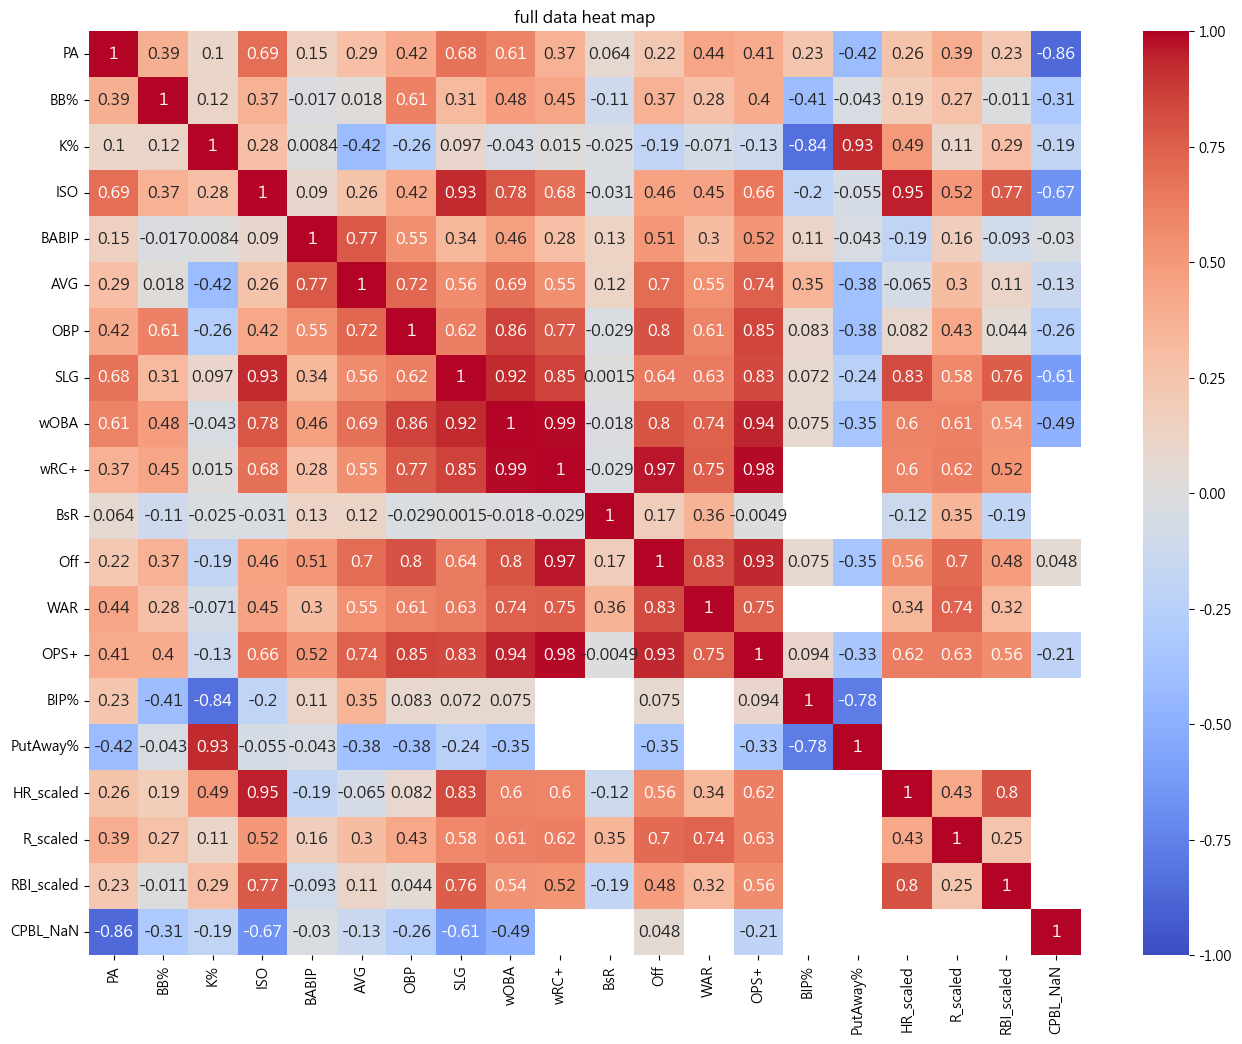

In [357]:
tool.plot_heatmap(df_num, 'full data heat map')

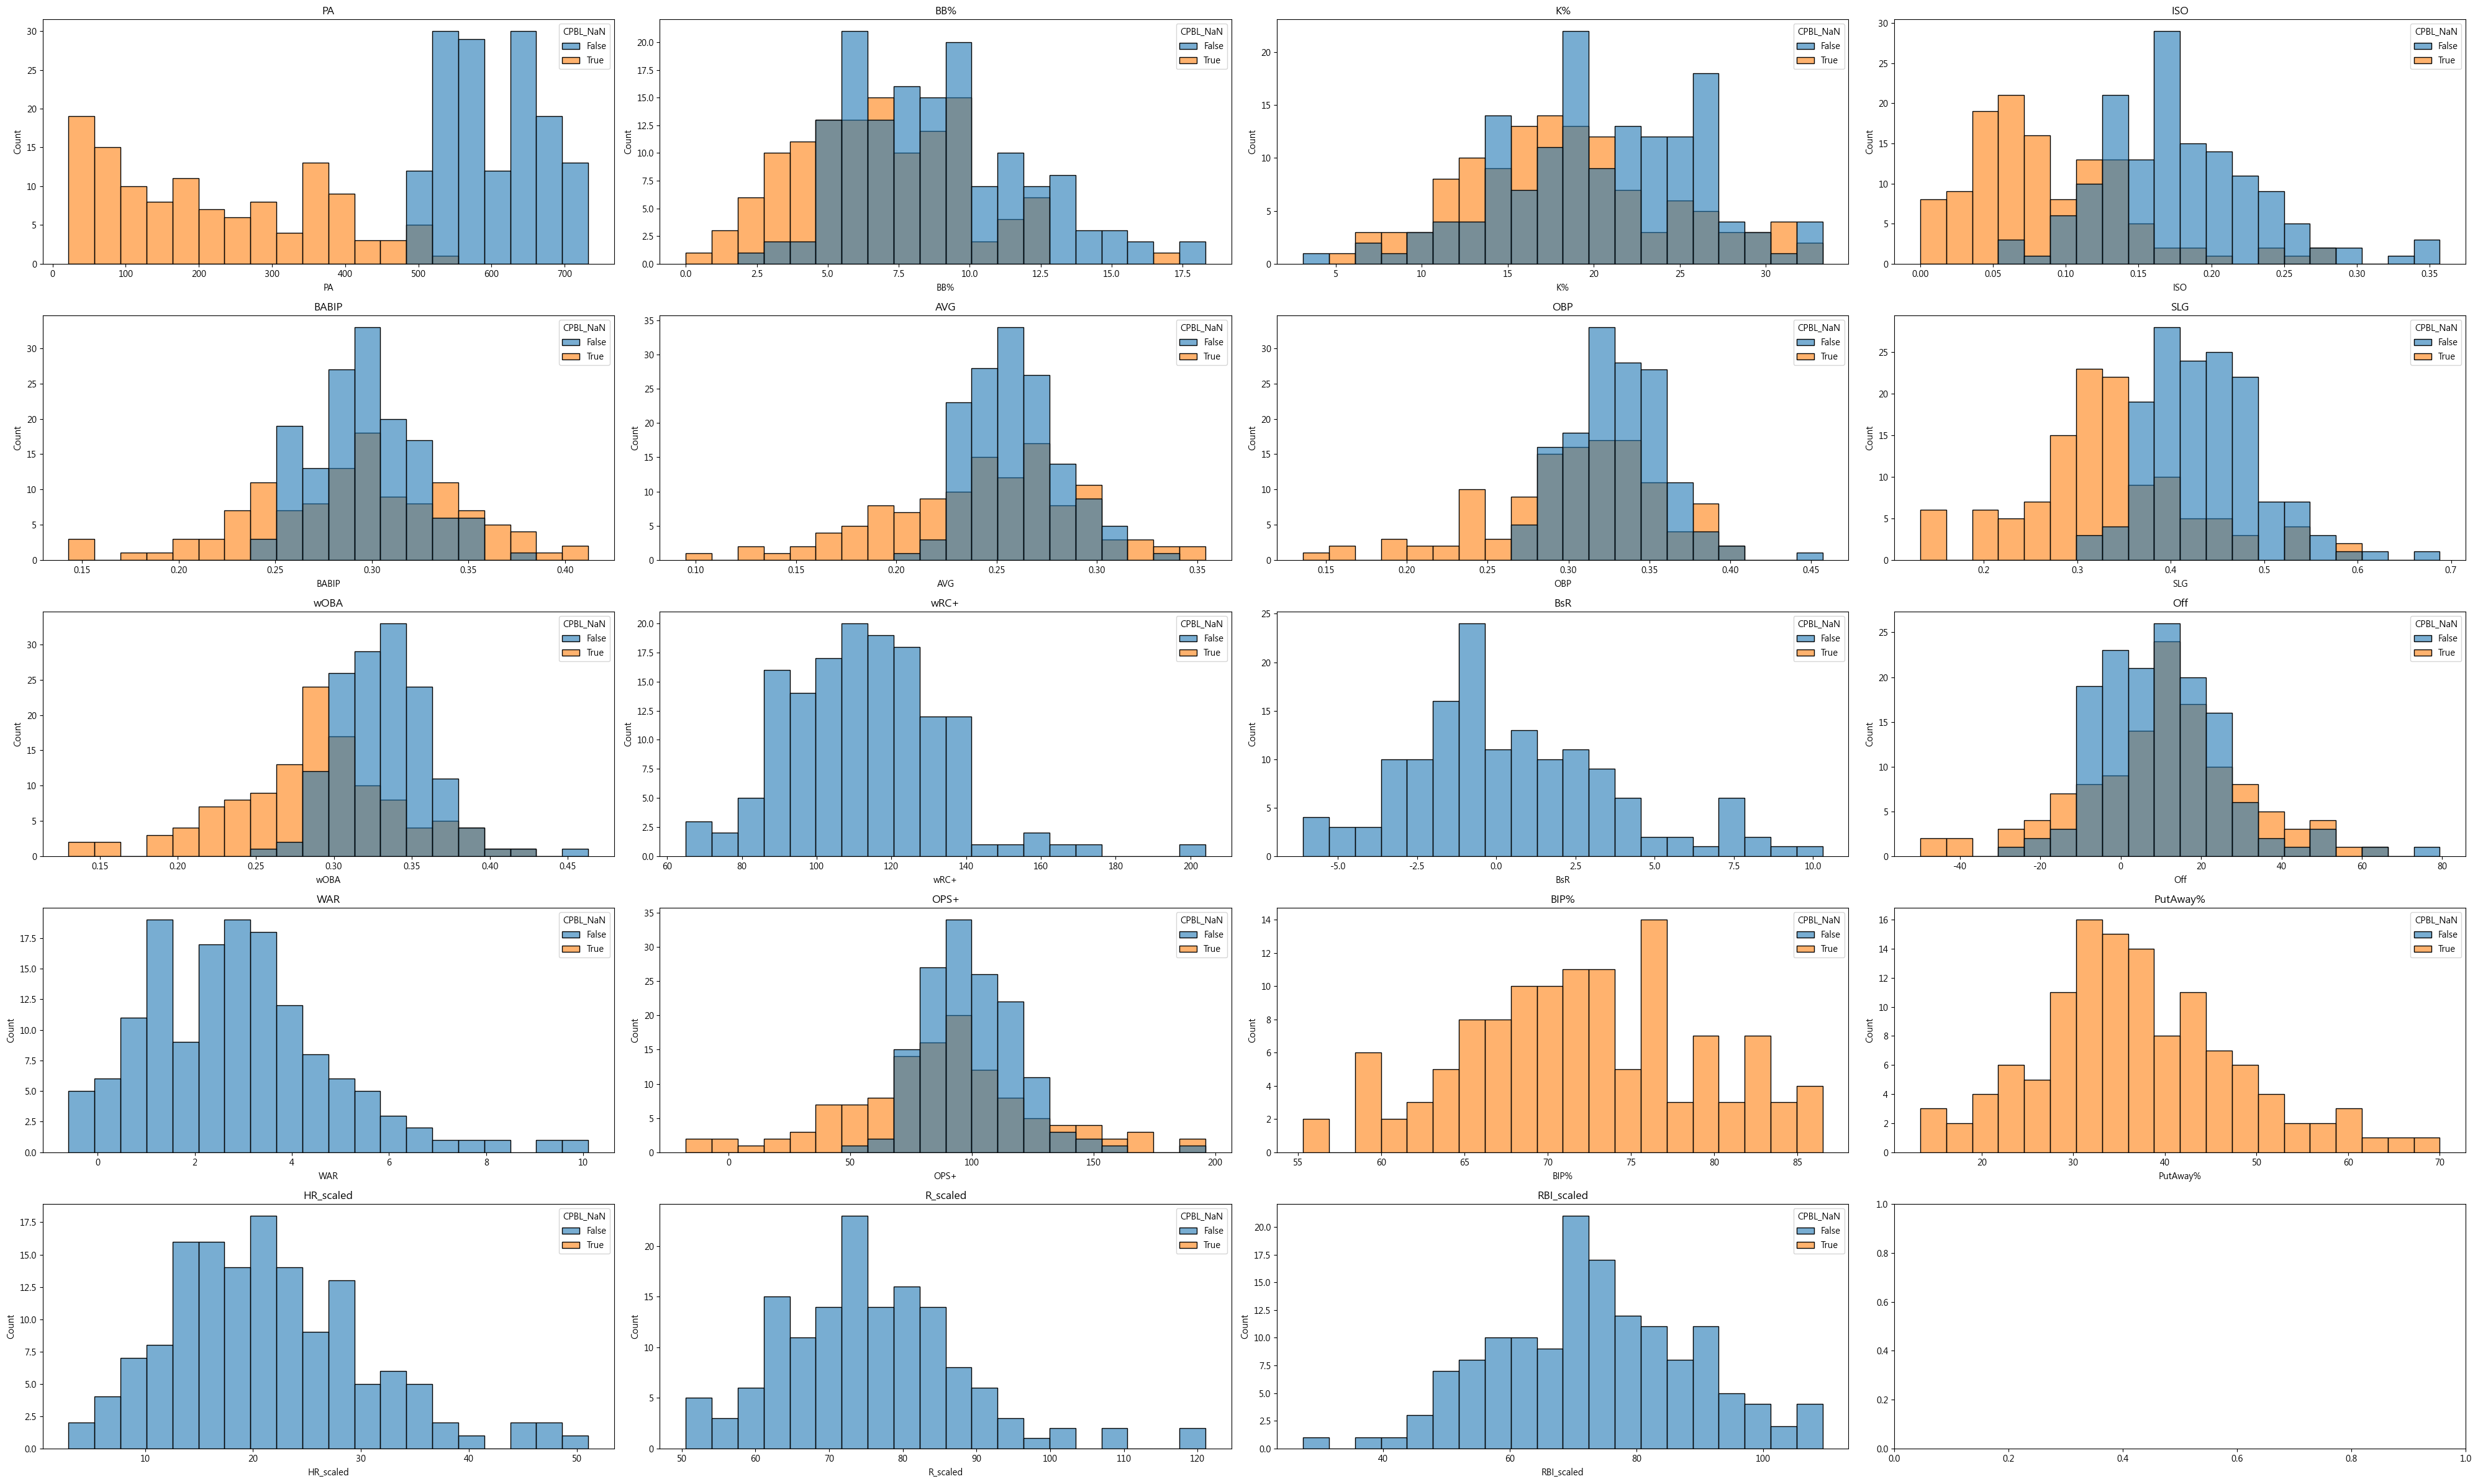

<Figure size 640x480 with 0 Axes>

In [358]:
col = [c for c in df_num.columns if c != 'CPBL_NaN']  

fig, axes = plt.subplots(5, 4, figsize=(40, 24))
axes = axes.flatten()

for i, c in enumerate(col):
    sns.histplot(data=df_num, x=c, hue='CPBL_NaN', bins=20, alpha=0.6, ax=axes[i])
    axes[i].set_title(c)

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

In [359]:
'''df_clean = df_num.dropna(subset=['HR_scaled'])

X_train = df_clean[['ISO', 'SLG','OPS+']]
y_train = df_clean['HR_scaled']


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

missing = df_num.loc[df_num['HR_scaled'].isna(), ['ISO', 'SLG','OPS+']]
predicted_values = linear_model.predict(missing)

df_num.loc[df_num['HR_scaled'].isna(), 'HR_scaled'] = predicted_values
'''

"df_clean = df_num.dropna(subset=['HR_scaled'])\n\nX_train = df_clean[['ISO', 'SLG','OPS+']]\ny_train = df_clean['HR_scaled']\n\n\nlinear_model = LinearRegression()\nlinear_model.fit(X_train, y_train)\n\nmissing = df_num.loc[df_num['HR_scaled'].isna(), ['ISO', 'SLG','OPS+']]\npredicted_values = linear_model.predict(missing)\n\ndf_num.loc[df_num['HR_scaled'].isna(), 'HR_scaled'] = predicted_values\n"

In [360]:
feature = ['ISO', 'SLG', 'OPS+', 'HR_scaled']

imputer = IterativeImputer(random_state=42, sample_posterior=True, max_iter=10)

imputed_array = imputer.fit_transform(df_num[feature])

df_num[feature] = imputed_array

C:\Users\nnn60\AppData\Local\Temp\ipykernel_24292\2663931319.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[feature] = imputed_array


In [361]:
df_clean = df_num.dropna(subset=['wRC+'])

X_train = df_clean[['Off', 'OPS+', 'wOBA']]
y_train = df_clean['wRC+']


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

missing = df_num.loc[df_num['wRC+'].isna(), ['Off', 'OPS+', 'wOBA']]
predicted_values = linear_model.predict(missing)

df_num.loc[df_num['wRC+'].isna(), 'wRC+'] = predicted_values


In [362]:
feature = ['ISO', 'SLG', 'RBI_scaled', 'HR_scaled']

imputer = IterativeImputer(random_state=42, sample_posterior=True, max_iter=10)

imputed_array = imputer.fit_transform(df_num[feature])

df_num[feature] = imputed_array


C:\Users\nnn60\AppData\Local\Temp\ipykernel_24292\649306355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[feature] = imputed_array


In [363]:
feature = ['K%', 'BIP%', 'PutAway%', 'PA', 'AVG'] #後續train可加入['BB%', 'OBP', 'wOBA', 'Off', 'OPS+']看看效果 (tag)

imputer = IterativeImputer(random_state=42, sample_posterior=True, max_iter=10)

imputed_array = imputer.fit_transform(df_num[feature])

df_num[feature] = imputed_array

C:\Users\nnn60\AppData\Local\Temp\ipykernel_24292\3921951291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[feature] = imputed_array


In [364]:
df_clean = df_num.dropna(subset=['R_scaled'])

X_train = df_clean[['Off', 'wRC+', 'wOBA']]
y_train = df_clean['R_scaled']


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

missing = df_num.loc[df_num['R_scaled'].isna(), ['Off', 'wRC+', 'wOBA']]
predicted_values = linear_model.predict(missing)

df_num.loc[df_num['R_scaled'].isna(), 'R_scaled'] = predicted_values


In [365]:
feature = ['PA', 'BB%', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'Off', 'WAR', 'OPS+', 'HR_scaled', 'R_scaled']

imputer = IterativeImputer(random_state=42, sample_posterior=True, max_iter=10)

imputed_array = imputer.fit_transform(df_num[feature])

df_num[feature] = imputed_array

C:\Users\nnn60\AppData\Local\Temp\ipykernel_24292\1288735829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[feature] = imputed_array


In [366]:
feature_col = ['R_scaled', 'WAR', 'BsR'] #後續train可加入['BB%', 'BABIP', 'AVG', 'Off', 'HR_scaled', 'RBI_scaled']看看效果 (tag) 

rf = RandomForestRegressor(n_estimators=100, 
                           max_depth=10, 
                           min_samples_leaf=3,
                           random_state=42, 
                           n_jobs=-1
                           )

bsr_imputer = IterativeImputer(estimator=rf, random_state=42, max_iter=70, sample_posterior=False)
df_num[feature_col] = bsr_imputer.fit_transform(df_num[feature_col])

C:\Users\nnn60\AppData\Local\Temp\ipykernel_24292\2103422635.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[feature_col] = bsr_imputer.fit_transform(df_num[feature_col])


In [367]:
df_num['Num_Ordi'] = df['Num_Ordi']
imputer = KNNImputer(n_neighbors=2)

df_imputed = pd.DataFrame(
    imputer.fit_transform(df_num),
    columns=df_num.columns,
    index=df_num.index
)

df_imputed.drop(columns=['PA'])

df_imputed.describe()
df.update(df_imputed)
df_num.update(df_imputed)
df['CPBL_NaN'] = df_imputed['CPBL_NaN']

C:\Users\nnn60\AppData\Local\Temp\ipykernel_24292\4267584764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Num_Ordi'] = df['Num_Ordi']
C:\Users\nnn60\AppData\Local\Temp\ipykernel_24292\4267584764.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [368]:
#tool.plot_heatmap(df_imputed, 'imputed data heat map')

In [369]:
df_num.info()
df_num.drop('BsR_missing', axis=1, inplace=True, errors='ignore')
df_num.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 312
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PA          267 non-null    float64
 1   BB%         267 non-null    float64
 2   K%          267 non-null    float64
 3   ISO         267 non-null    float64
 4   BABIP       267 non-null    float64
 5   AVG         267 non-null    float64
 6   OBP         267 non-null    float64
 7   SLG         267 non-null    float64
 8   wOBA        267 non-null    float64
 9   wRC+        267 non-null    float64
 10  BsR         267 non-null    float64
 11  Off         267 non-null    float64
 12  WAR         267 non-null    float64
 13  OPS+        267 non-null    float64
 14  BIP%        267 non-null    float64
 15  PutAway%    267 non-null    float64
 16  HR_scaled   267 non-null    float64
 17  R_scaled    267 non-null    float64
 18  RBI_scaled  267 non-null    float64
 19  CPBL_NaN    267 non-null    int64 

C:\Users\nnn60\AppData\Local\Temp\ipykernel_24292\850045631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('BsR_missing', axis=1, inplace=True, errors='ignore')


PA         BB%          K%         ISO       BABIP         AVG  \
count  267.000000  267.000000  267.000000  267.000000  267.000000  267.000000   
mean   428.483146    7.906367   19.471536    0.136861    0.293648    0.251843   
std    221.881146    3.191058    5.957804    0.071536    0.040407    0.037531   
min     22.000000    0.000000    3.100000    0.000000    0.143000    0.095000   
25%    224.000000    5.750000   15.300000    0.074500    0.270000    0.235000   
50%    521.000000    7.700000   19.200000    0.133000    0.294000    0.256000   
75%    606.500000    9.600000   23.900000    0.182000    0.318000    0.274000   
max    732.000000   18.300000   33.300000    0.357000    0.412000    0.354000   

              OBP         SLG        wOBA        wRC+  ...         Off  \
count  267.000000  267.000000  267.000000  267.000000  ...  267.000000   
mean     0.318232    0.388712    0.310843  100.440766  ...   10.240800   
std      0.043555    0.091404    0.048299   31.238458  ...   18.553328   
min      0.136000    0.132000    0.130000  -15.816227  ...  -49.882572   
25%      0.296000    0.331500    0.286500   84.924804  ...   -0.800000   
50%      0.324000    0.398000    0.315000  102.890730  ...   10.000000   
75%      0.346000    0.452500    0.341000  120.649697  ...   20.290914   
max      0.457000    0.688000    0.463000  204.000000  ...   79.400000   

              WAR        OPS+        BIP%    PutAway%   HR_scaled    R_scaled  \
count  267.000000  267.000000  267.000000  267.000000  267.000000  267.000000   
mean     3.529639   94.361049   69.127761   38.265121   20.015152   83.087842   
std      2.345264   30.841902    8.055064   13.005293   12.106636   13.209821   
min     -0.962263  -17.600000   46.986591    5.697458  -18.259922   50.546022   
25%      1.700000   80.621317   63.606623   29.736757   12.999283   73.456141   
50%      3.300000   94.720044   69.365748   37.445687   18.884120   84.693878   
75%      4.850000  110.699114   74.050552   46.923203   27.007140   92.482863   
max     11.281666  195.957204   87.107424   73.978376   56.273357  121.060383   

       RBI_scaled    CPBL_NaN    Num_Ordi  
count  267.000000  267.000000  267.000000  
mean    71.964002    0.456929   19.204120  
std     21.607658    0.499077   17.710721  
min     14.795336    0.000000    0.000000  
25%     57.571471    0.000000    9.000000  
50%     70.957950    0.000000   10.500000  
75%     85.518193    1.000000   25.500000  
max    149.919504    1.000000   69.000000  

[8 rows x 21 columns]

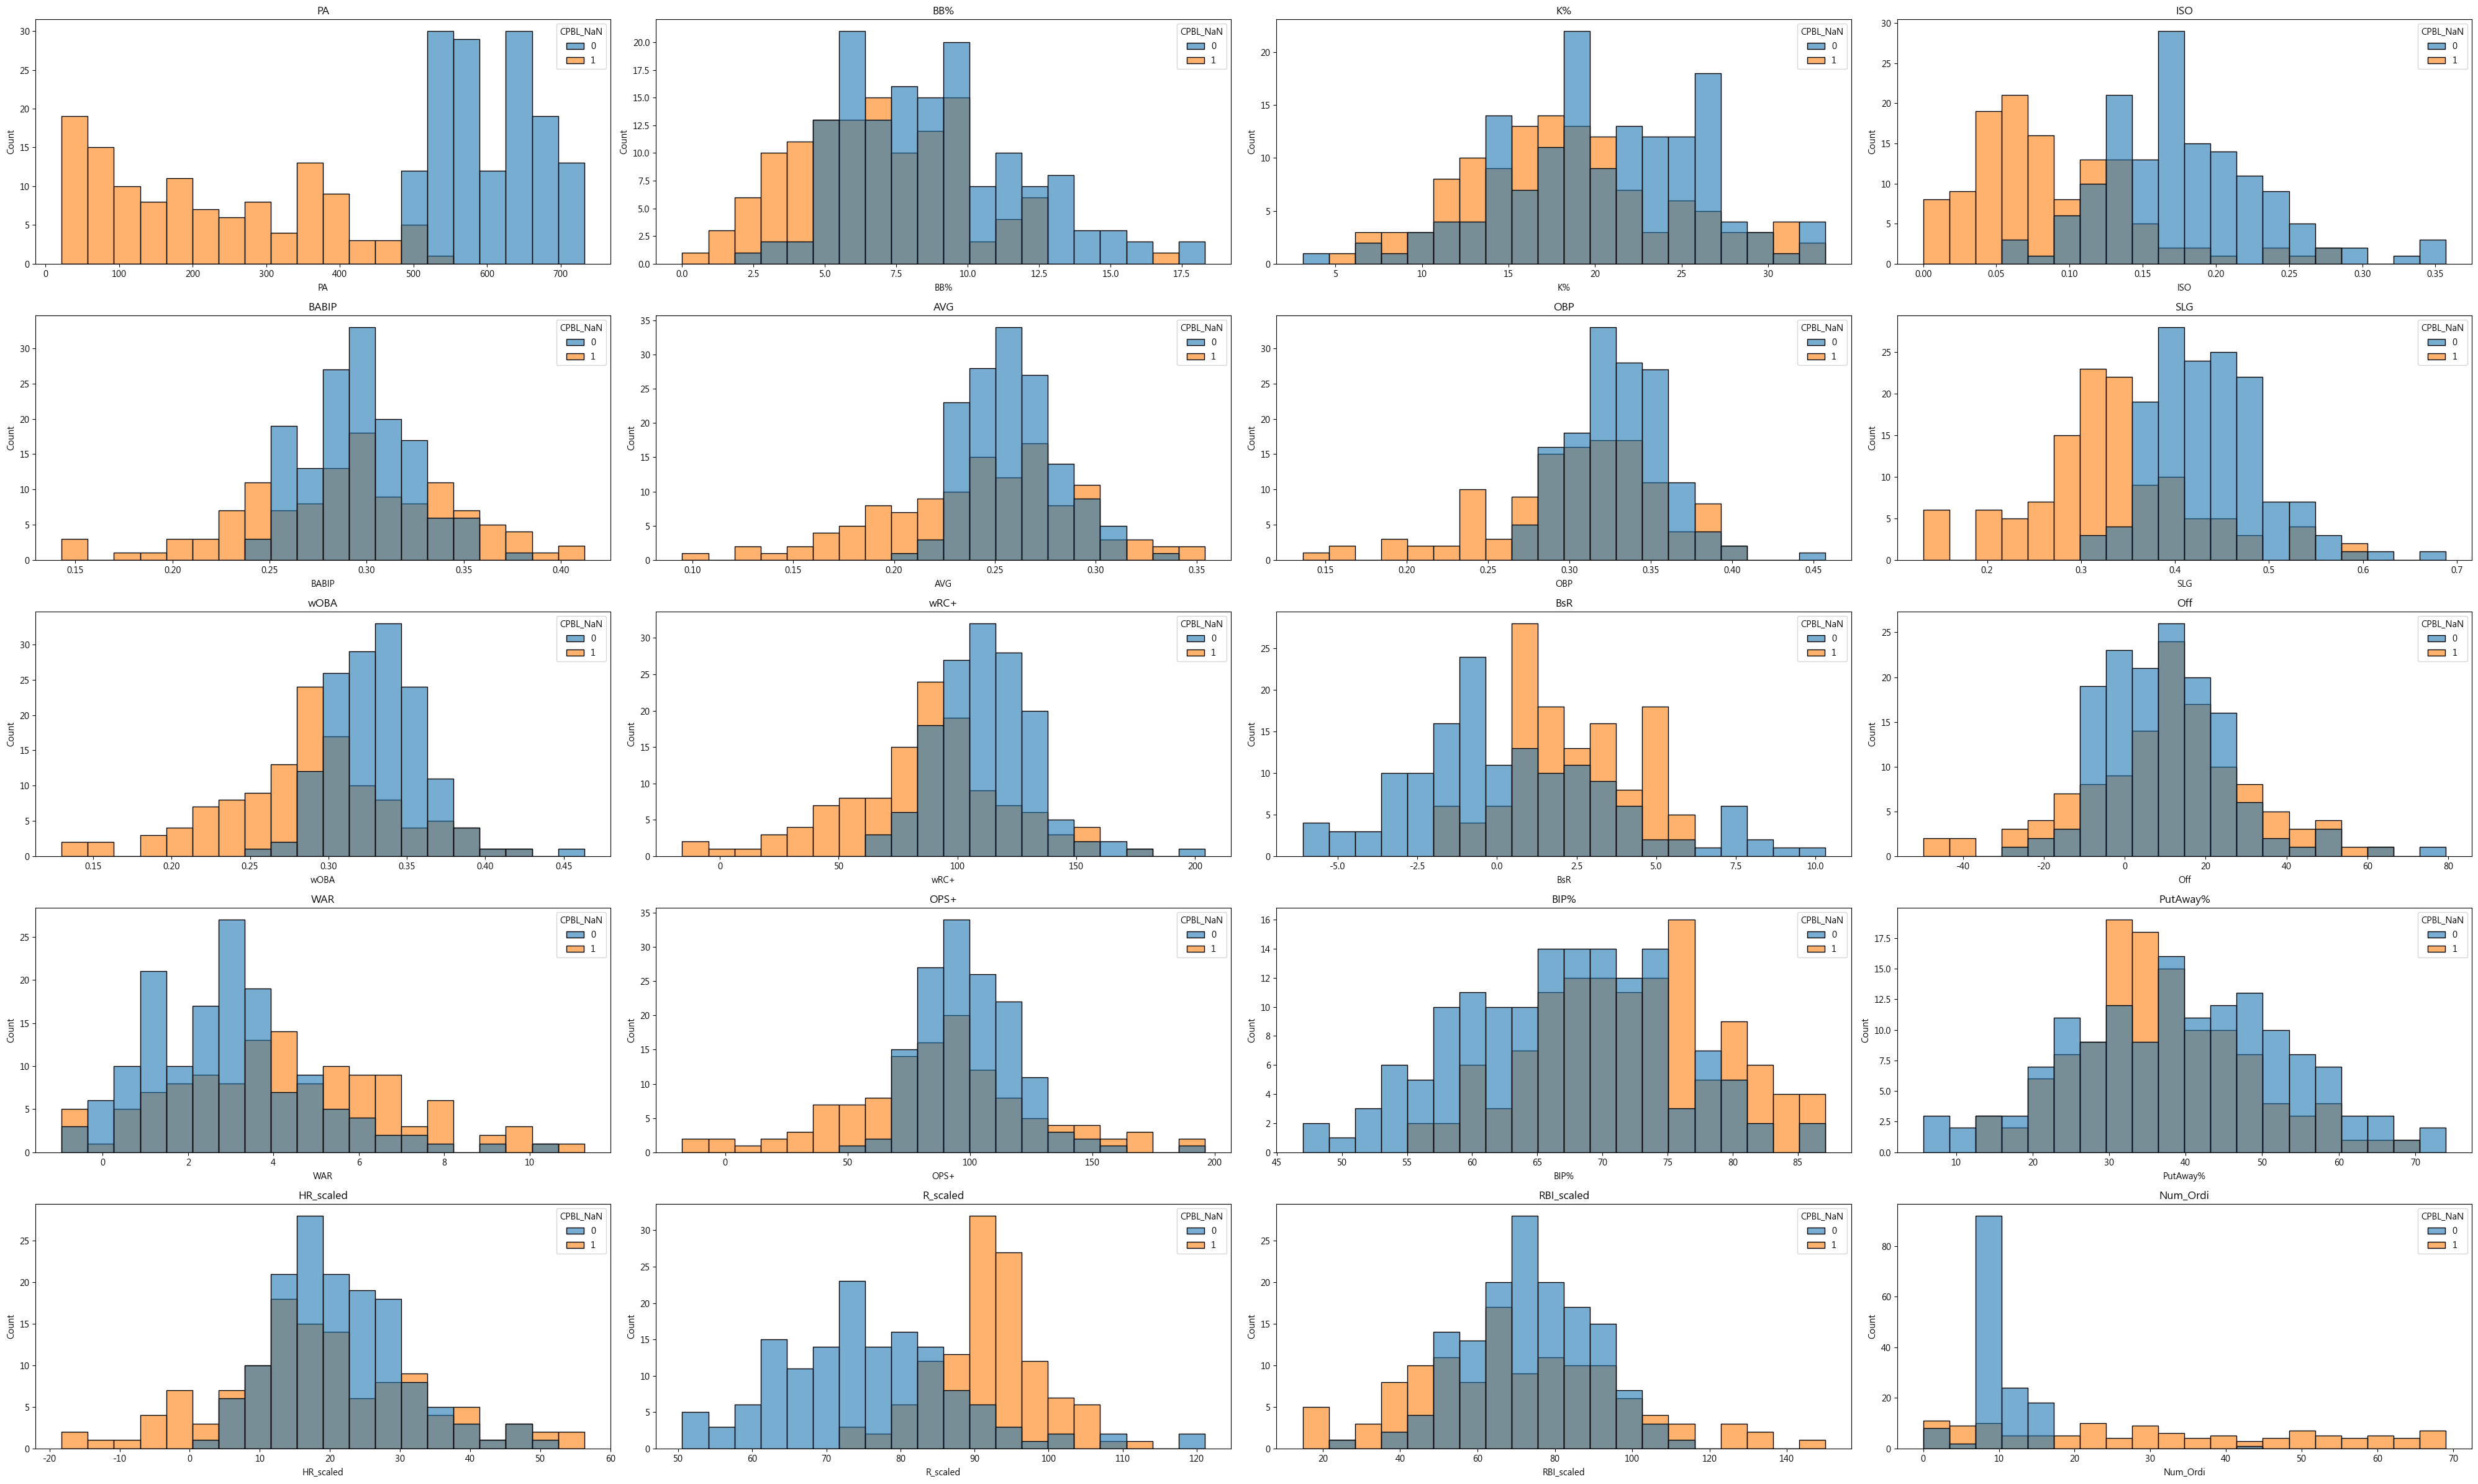

<Figure size 640x480 with 0 Axes>

In [370]:
col = [c for c in df_num.columns if c != 'CPBL_NaN']

fig, axes = plt.subplots(5, 4, figsize=(40, 24))
axes = axes.flatten()

for i, c in enumerate(col):
    sns.histplot(data=df_num, x=c, hue='CPBL_NaN', bins=20, alpha=0.6, ax=axes[i])
    axes[i].set_title(c)

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

In [371]:
df.update(df_num)
df['CPBL_NaN'] = df_num['CPBL_NaN'] 


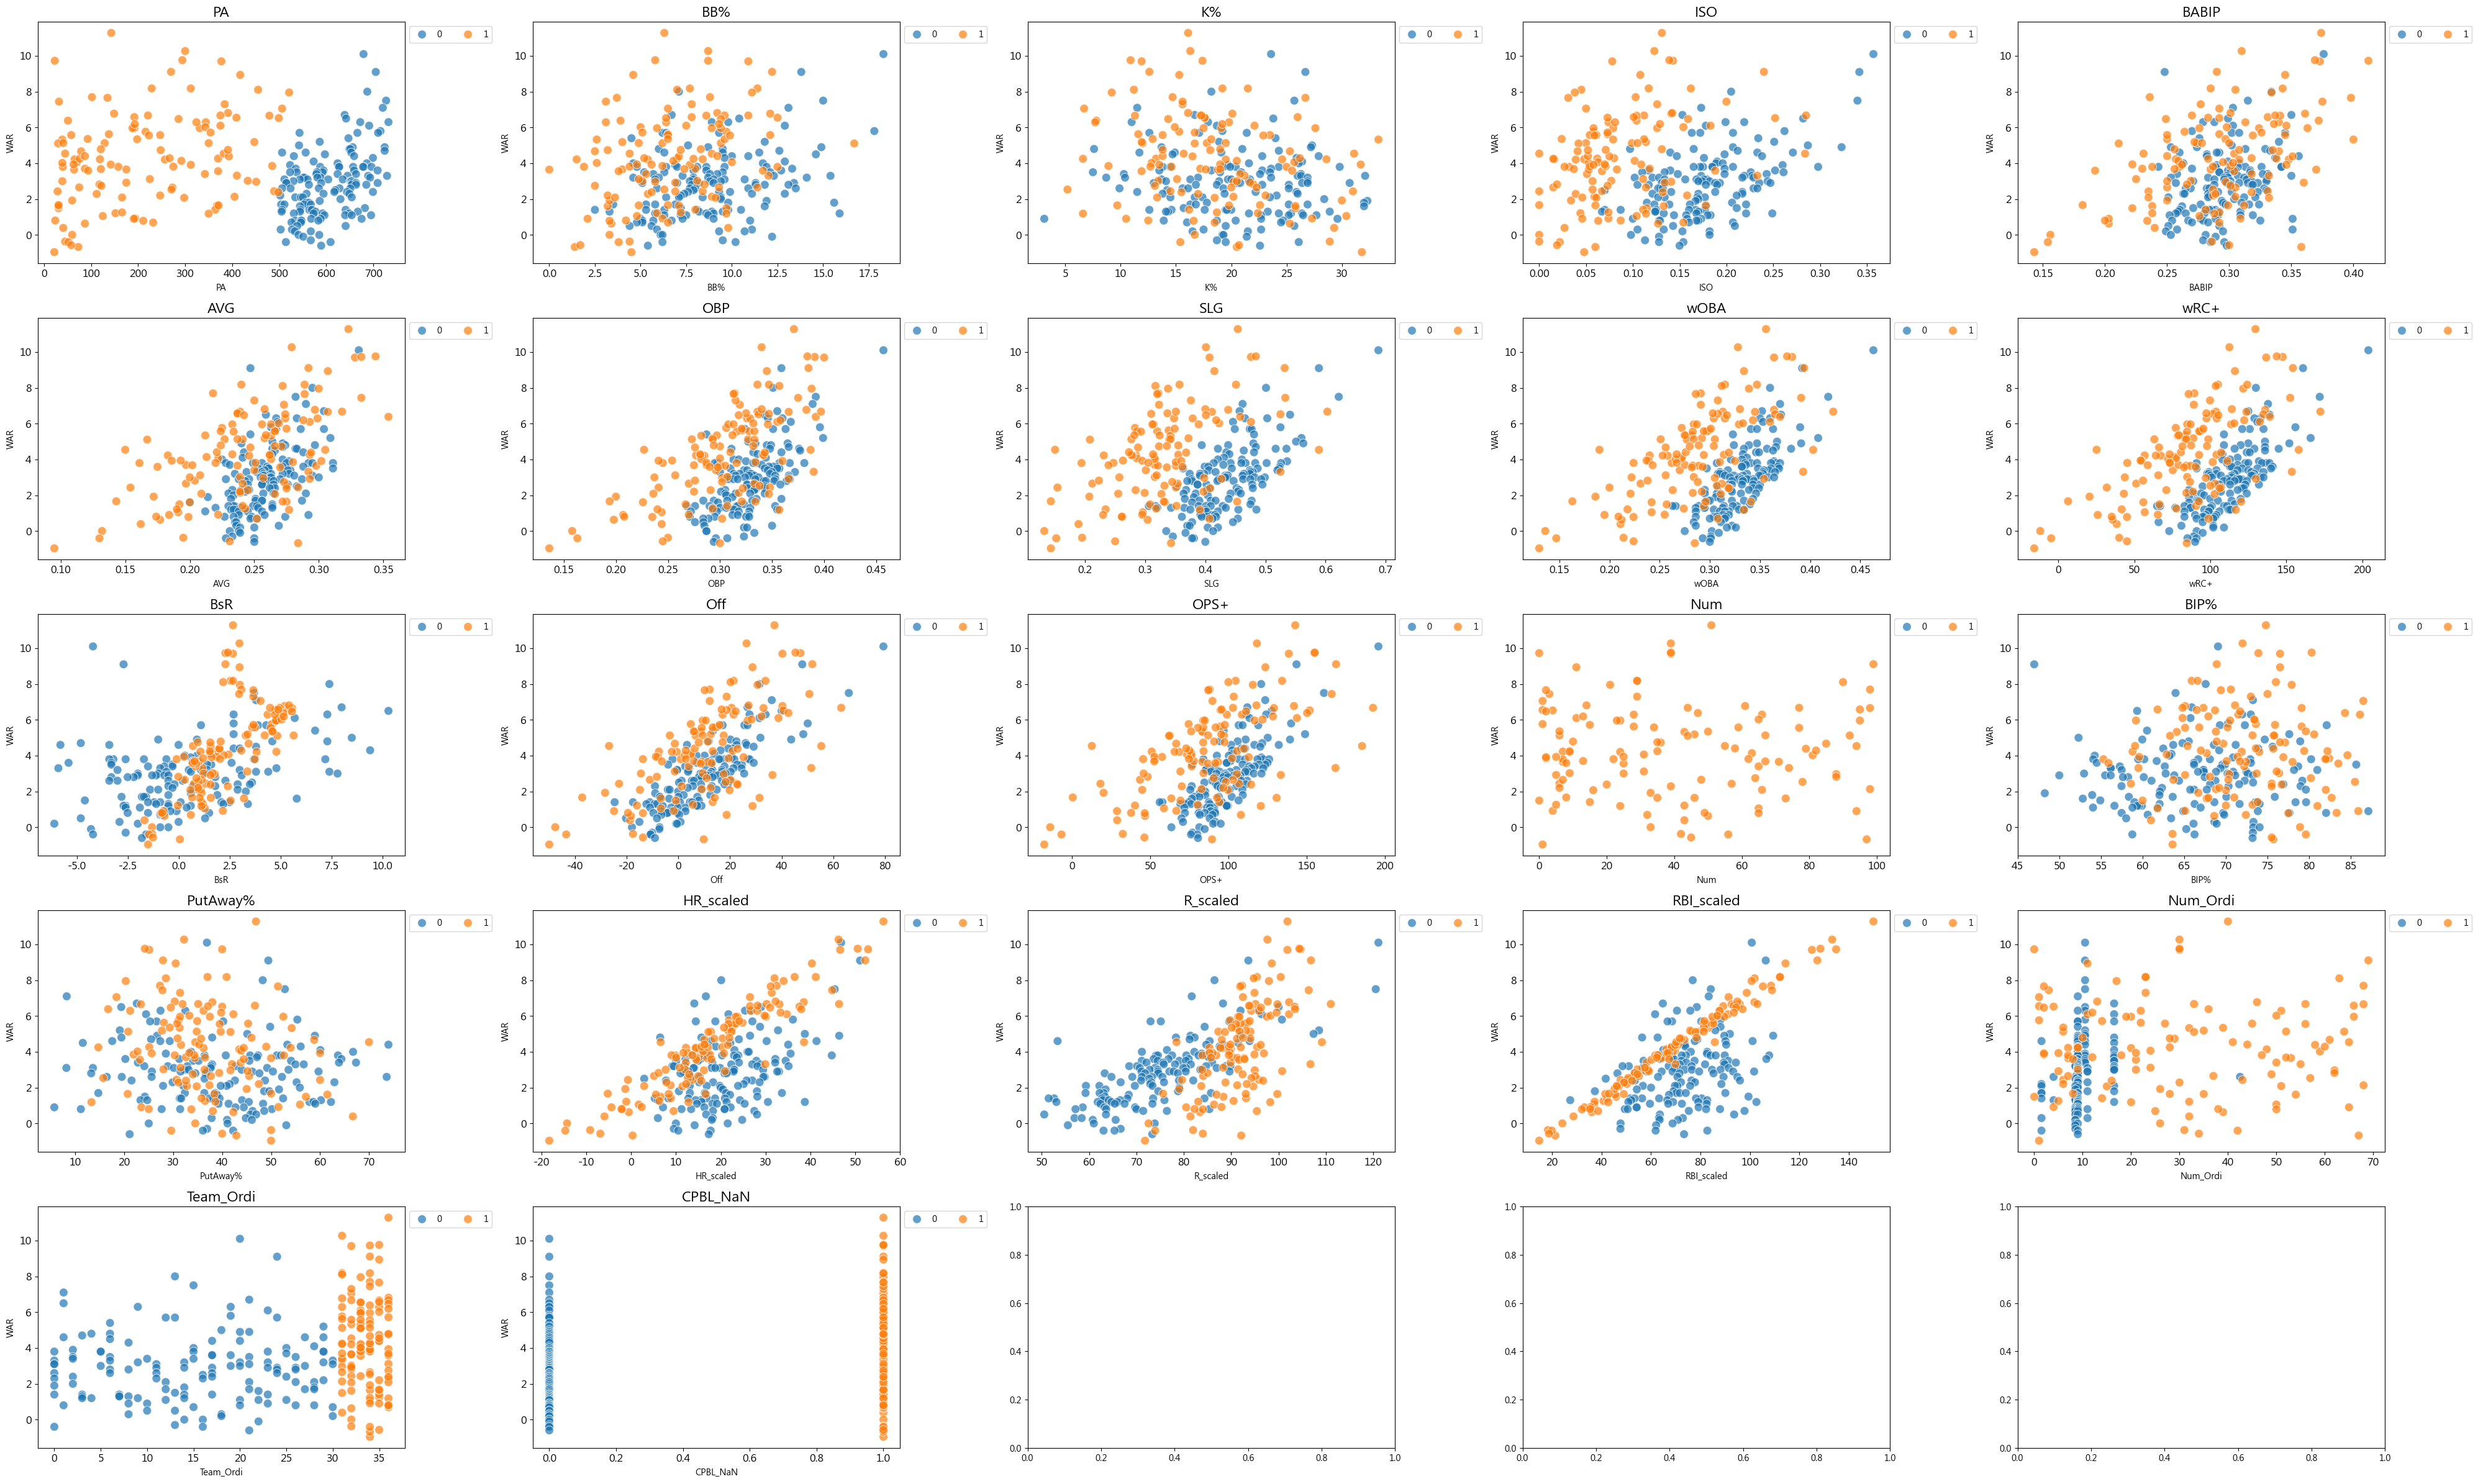

In [376]:
col = [x for x in df.select_dtypes(include=np.number).columns 
       if x not in ['WAR']]


fig, axes = plt.subplots(5, 5, figsize=(40, 24))


for i, j in enumerate(col):
    sns.scatterplot(
    data=df,
    x=j,
    y='WAR',
    hue='CPBL_NaN',
    s=100,
    alpha=0.7,
    ax=axes[i//5, i%5]
    )
    axes[i//5, i%5].set_title(j, fontsize=16)
    axes[i//5, i%5].tick_params(labelsize=12)
    axes[i//5, i%5].legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()

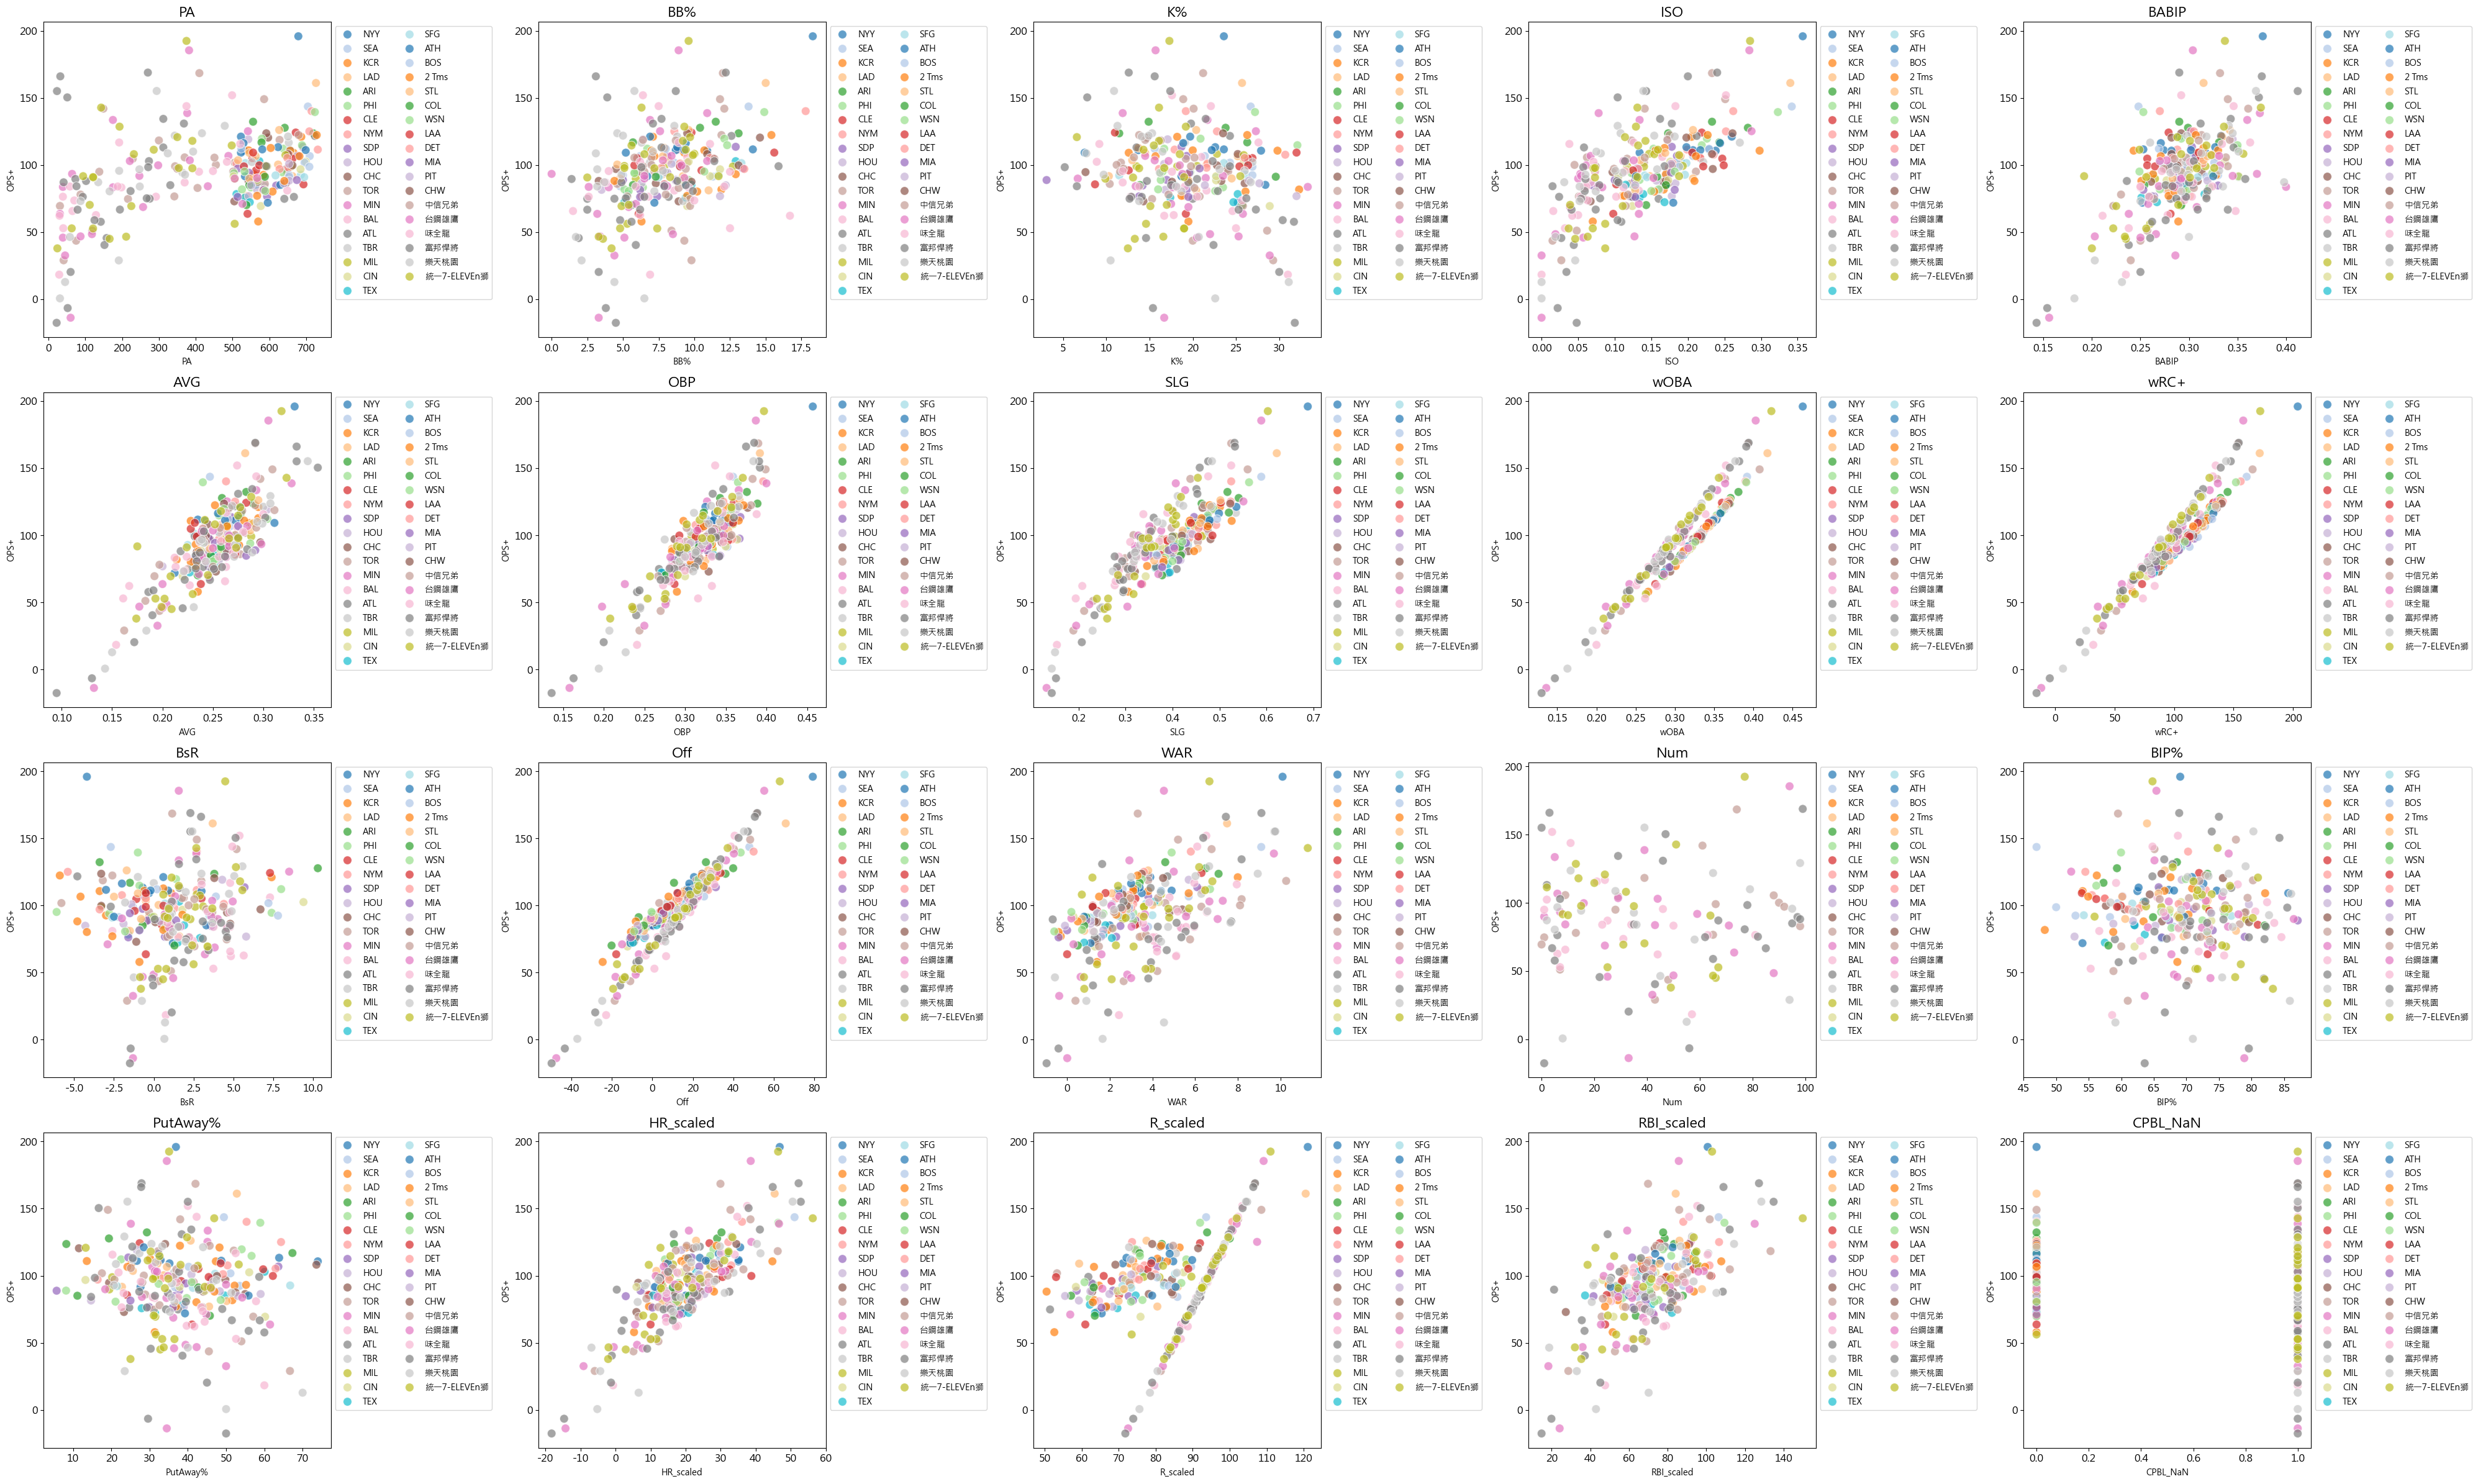

In [377]:
col = [x for x in df.select_dtypes(include=np.number).columns 
       if x not in ['OPS+', 'Num_Ordi', 'Team_Ordi']]


fig, axes = plt.subplots(4, 5, figsize=(40, 24))
palette = sns.color_palette("tab20", n_colors=df['Team'].nunique())


for i, j in enumerate(col):
    sns.scatterplot(
    data=df,
    x=j,
    y='OPS+',
    hue='Team',
    s=100,
    palette=palette,
    alpha=0.7,
    ax=axes[i//5, i%5]
    )
    axes[i//5, i%5].set_title(j, fontsize=16)
    axes[i//5, i%5].tick_params(labelsize=12)
    axes[i//5, i%5].legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()

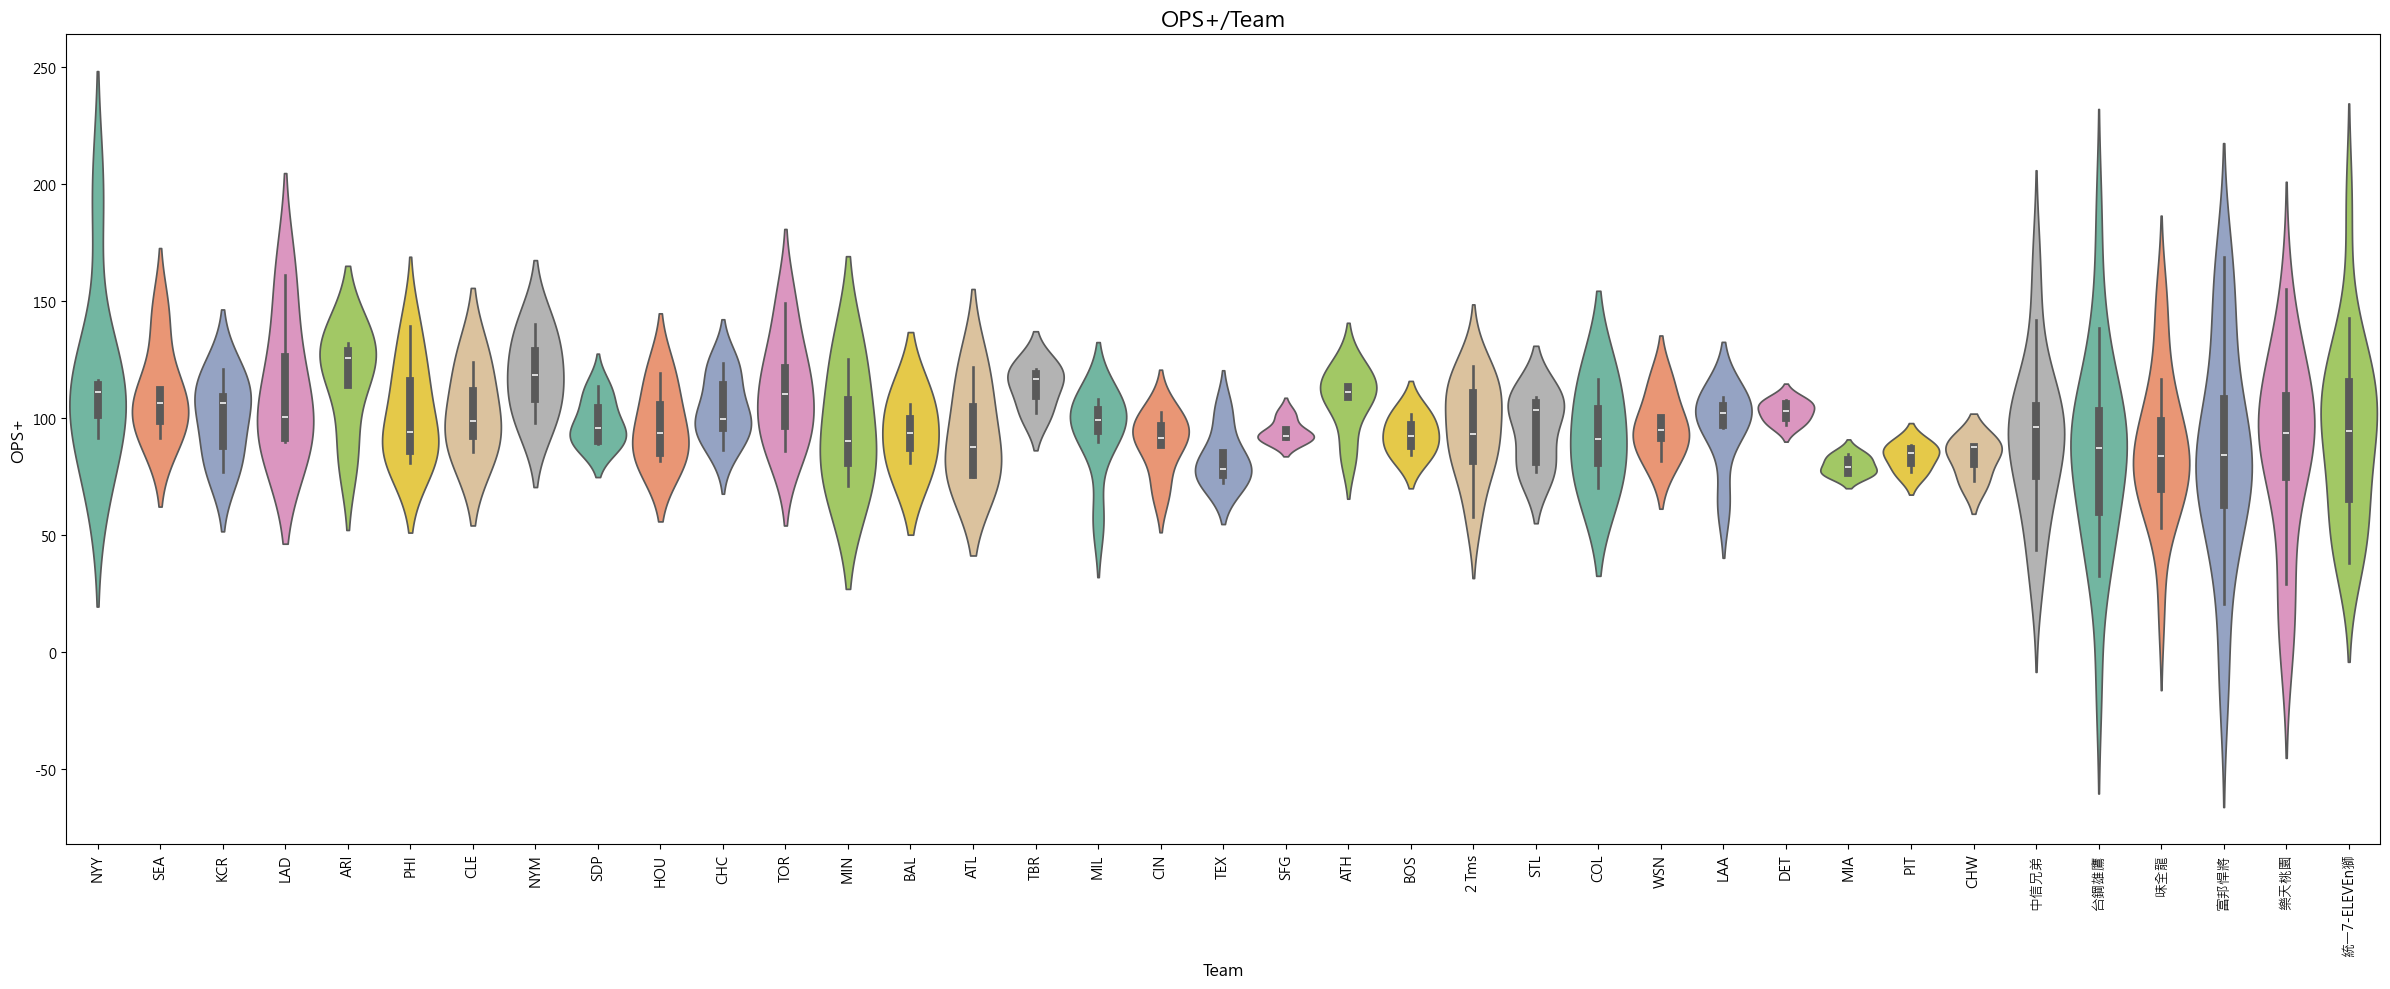

In [378]:
plt.figure(figsize=(24,10))

sns.violinplot(
    data=df,
    x='Team',
    y='OPS+',
    palette='Set2', 
    inner='box',   
    width=0.9,
    hue='Team'
)

plt.xticks(rotation=90)

plt.xlabel('Team', fontsize=12)
plt.ylabel('OPS+', fontsize=12)
plt.title('OPS+/Team', fontsize=16)

plt.tight_layout()
plt.show()